In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [68]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.2', '2.2.3', '0.13.2', '3.10.0')

In [69]:
df = pd.read_csv('Cars.csv')

In [70]:
# Print the first rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [71]:
# Shows the datatype of the input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [72]:
#Describe give the statistical info like count, mean, std and many more
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [73]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

# Exploratory Data Analysis (EDA)

In [74]:
# Mapping the owner with the unique numeric value and filling the null values Nan with 0.
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

df['owner'] = df['owner'].map(owner_mapping)
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [75]:
# Checking the fuel data
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [76]:
# Removed CNG and LPG from the fuel
df = df.query("fuel not in ['CNG', 'LPG']")
# Checking the values of the fuel after removing.
df['fuel'].unique() 

array(['Diesel', 'Petrol'], dtype=object)

In [77]:
#  For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
# Checking the mileage data that shows in a rows
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [78]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)
# Checking the engine data that shows in a rows
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [79]:
##For the feature max_power, remove “bhp” and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
# Checking the max_power data that shows in a rows
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [80]:
##For the feature km_driven, converting the int to the column to numerical type (e.g., float)
df['km_driven'] = df['km_driven'].astype(float)
# Checking the km_driven data that shows in a rows
df['km_driven'].head()

0    145500.0
1    120000.0
2    140000.0
3    127000.0
4    120000.0
Name: km_driven, dtype: float64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   float64
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 878.6+ KB


In [82]:
# Keeping first name of the brand and removing other values
df['name'] = df['name'].str.split(' ').str[0] 
#str.split(' '): Splits each value in the brand column into a list of words based on spaces (e.g., ['Toyota', 'Corolla']).
#str[0]: Extracts the first word from the split list (e.g., Toyota).
#The updated brand column will now contain only the first word.

# Checking the brand value that shows in a rows
df['name'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: name, dtype: object

In [83]:
# Deleting the feature (column) torque
df= df.drop(columns=['torque'])

In [84]:
# Deleteing the data of the "Test Drive Cars" from the feature owner.
df = df[df['owner'] != 5]
# Condition (df['car_name'] != 'Test Drive Cars'): Keeps only rows where the car_name is not equal to "Test Drive Cars."
# Update DataFrame: The DataFrame is updated to include only the rows that meet the condition.
# Checking the owner data
df['owner'].unique()

array([1, 2, 3, 4])

<Axes: xlabel='seller_type', ylabel='count'>

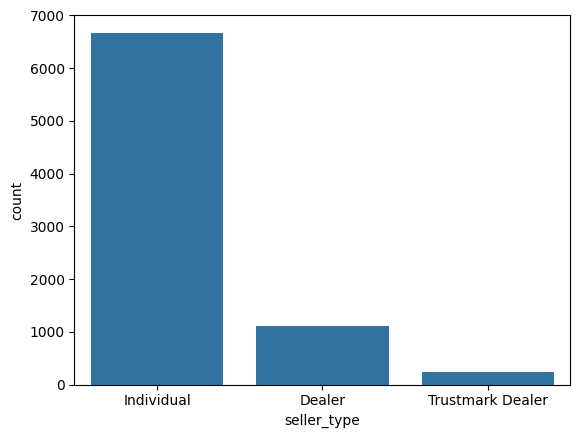

In [85]:
#scatter plot to see the seller_type
sns.countplot(data = df, x = 'seller_type')

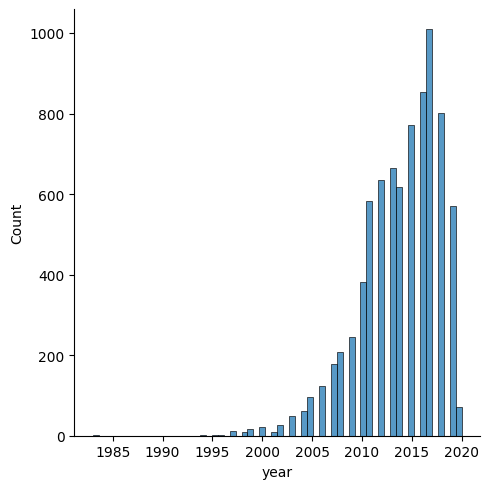

In [86]:
#Displot to show the year data 
sns.displot(data = df, x = 'year')

<Axes: xlabel='km_driven', ylabel='mileage'>

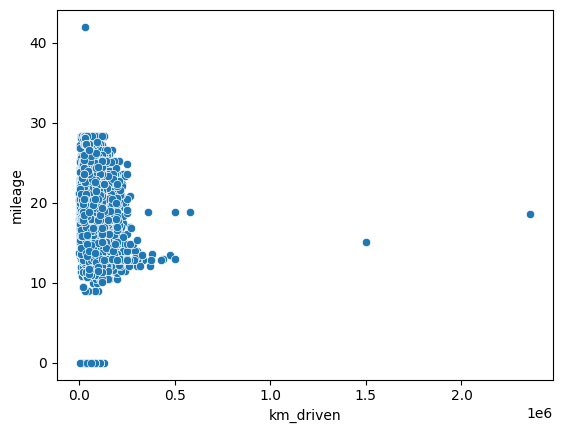

In [87]:
#scatter plot for km_driven vs mileage
sns.scatterplot(x= df['km_driven'], y = df['mileage'])

<Axes: xlabel='engine', ylabel='selling_price'>

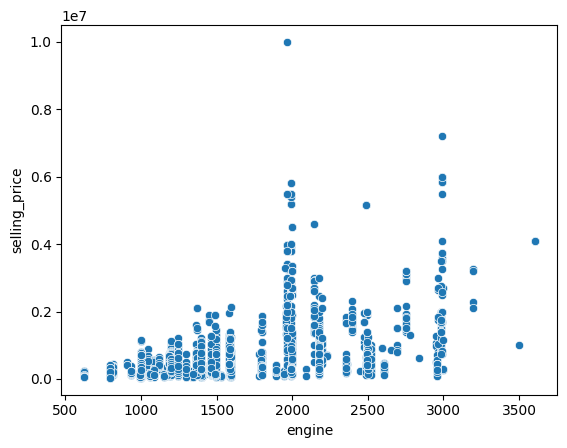

In [88]:
#scatter plot for engine vs selling price
sns.scatterplot(x= df['engine'], y = df['selling_price'])

<Axes: xlabel='engine', ylabel='max_power'>

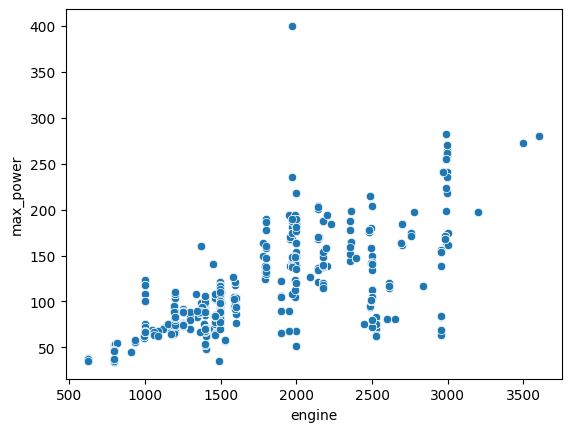

In [89]:
#scatter plot for engine vs max_power
sns.scatterplot(x =df['engine'], y=df['max_power'])

<Axes: xlabel='fuel', ylabel='km_driven'>

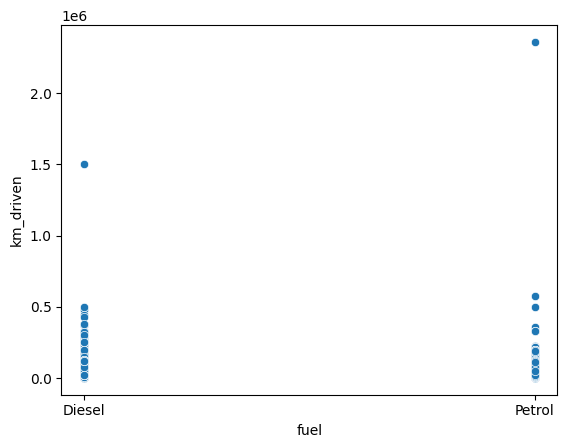

In [90]:
#scatter plot for engine vs max_power
sns.scatterplot(x =df['fuel'], y=df['km_driven'])

Text(0.5, 0, 'Seller Type')

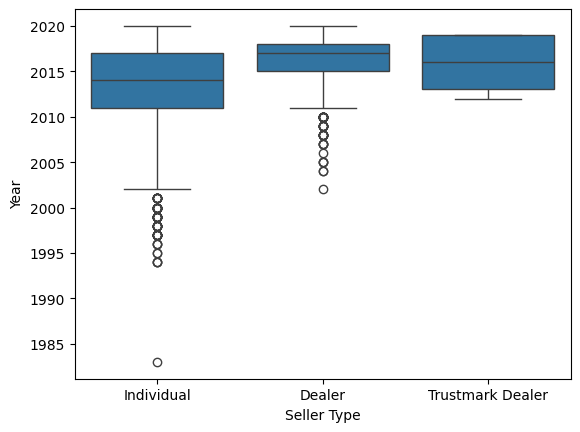

In [91]:
#Boxplot for sellet_type and year
sns.boxplot(x = df["seller_type"], y = df["year"]);
plt.ylabel("Year")
plt.xlabel("Seller Type")

<Axes: xlabel='engine', ylabel='max_power'>

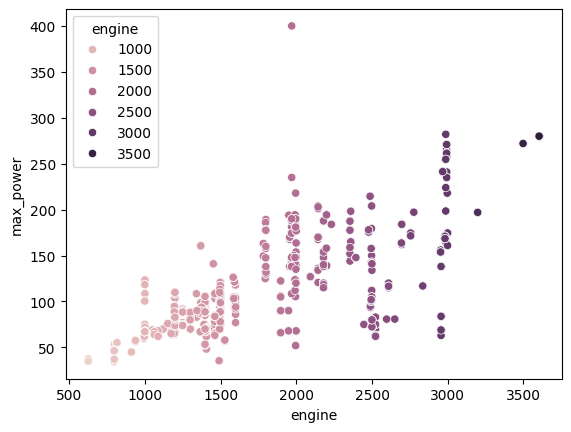

In [92]:
#Scatter plot for selling_price and year
sns.scatterplot(x = df['engine'], y = df['max_power'], hue=df['engine'])

## Correlation Matrix

### Label Encoder

In [93]:
#label Encoder for transmission 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])
df["transmission"].unique()

array([1, 0])

In [94]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [95]:
#label Encoder for fuel 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["fuel"].unique()

array([0, 1])

In [96]:
# Creating a dummies data for previous data set
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')
print(df_encoded)

         name  year  selling_price  km_driven  fuel  transmission  owner  \
0      Maruti  2014         450000   145500.0     0             1      1   
1       Skoda  2014         370000   120000.0     0             1      2   
2       Honda  2006         158000   140000.0     1             1      3   
3     Hyundai  2010         225000   127000.0     0             1      1   
4      Maruti  2007         130000   120000.0     1             1      1   
...       ...   ...            ...        ...   ...           ...    ...   
8123  Hyundai  2013         320000   110000.0     1             1      1   
8124  Hyundai  2007         135000   119000.0     0             1      4   
8125   Maruti  2009         382000   120000.0     0             1      1   
8126     Tata  2013         290000    25000.0     0             1      1   
8127     Tata  2013         290000    25000.0     0             1      1   

      mileage  engine  max_power  seats  seller_type_Dealer  \
0       23.40  1248.0   

In [97]:
# Dropping the columns for brand name because it have no use
df_encoded = df_encoded.drop('name', axis='columns')

<Axes: >

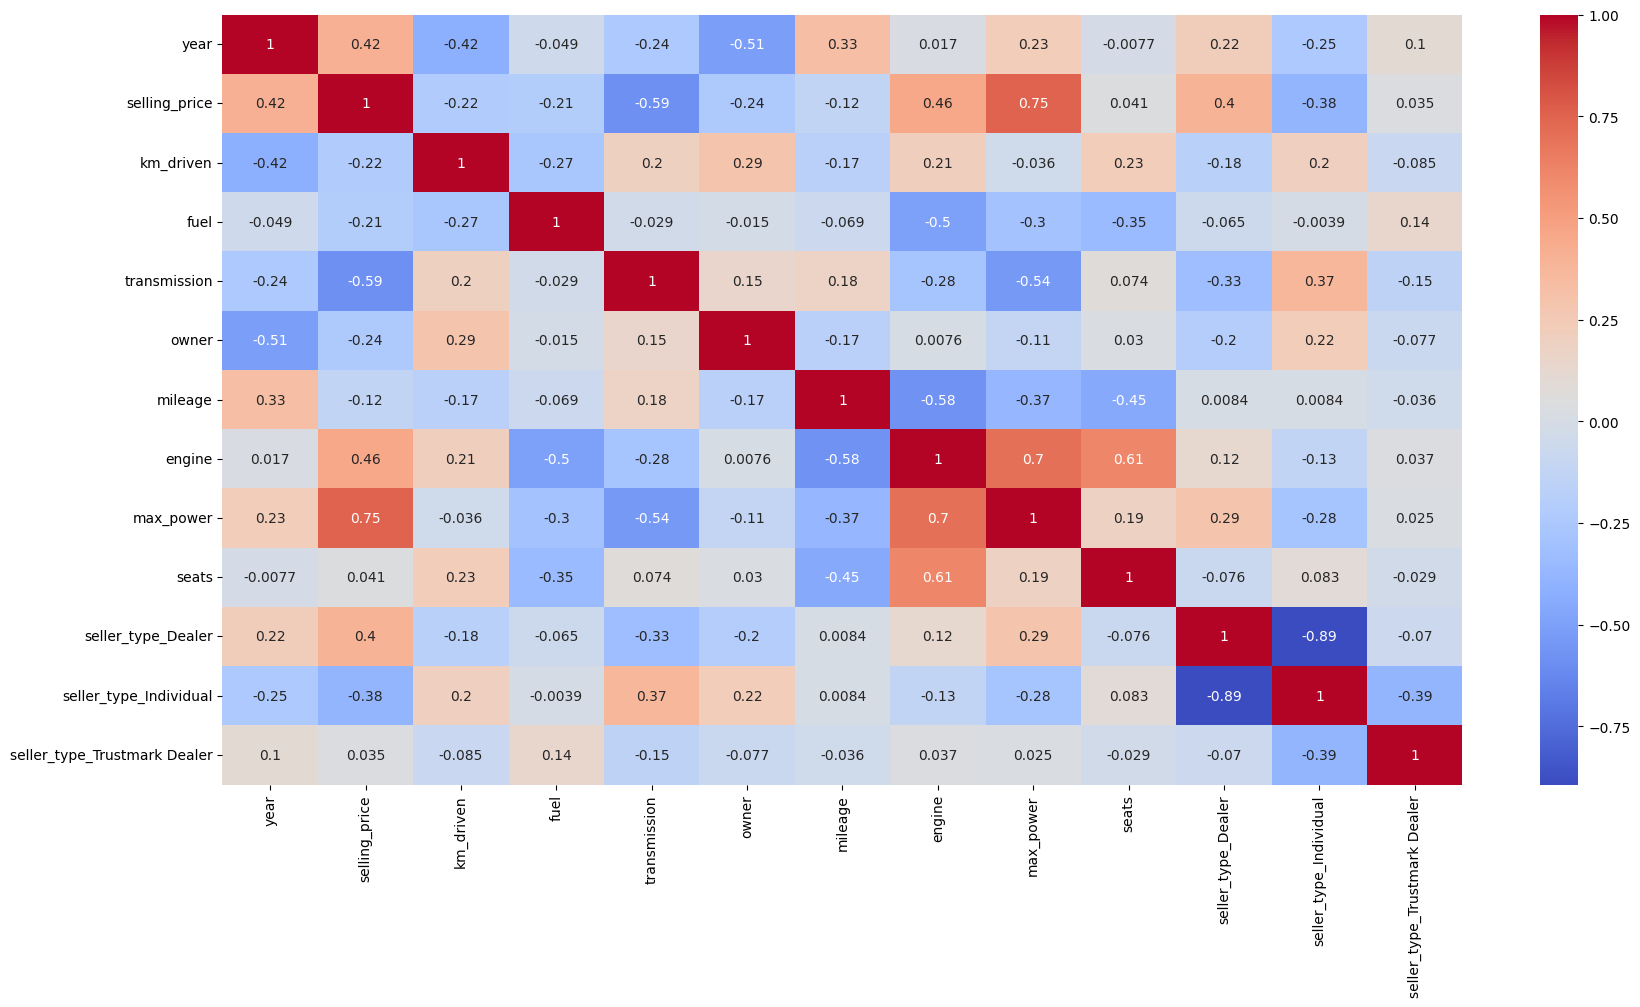

In [98]:
# Let's check out heatmap
plt.figure(figsize= (20, 10))
sns.heatmap(df_encoded.corr(), annot= True, cmap= 'coolwarm')

# Feature Selection

In [99]:
#Identifying and selecting the most relevant variables to improve model performance

X = df_encoded[['engine', 'mileage', 'km_driven', 'year']]
assert len(X.shape) ==2

In [100]:
y = np.log(df_encoded['selling_price'])
assert len(y.shape)  == 1

### Train Test Split

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)
#Specifies that 30% of the data will be allocated to the test set, while the remaining 70% will go to the training set.
#Specifies that 30% of the data will be allocated to the test set, while the remaining 70% will go to the training set.

# Preprocessing

In [102]:
#check for null values
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       151
mileage      151
km_driven      0
year           0
dtype: int64

In [103]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       63
mileage      63
km_driven     0
year          0
dtype: int64

In [104]:
y_train.isna().sum()

np.int64(0)

In [105]:
y_test.isna().sum()

np.int64(0)

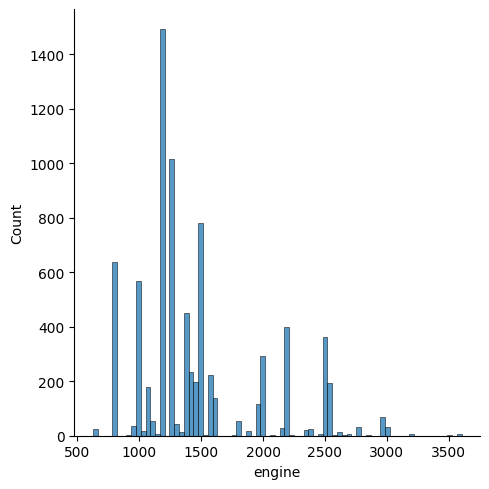

In [106]:
sns.displot(data=df_encoded, x='engine')

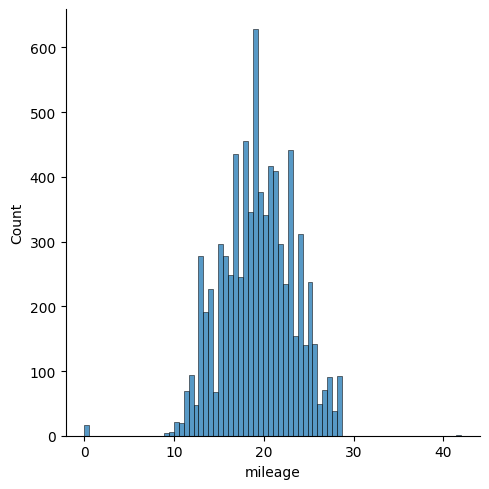

In [107]:
sns.displot(data=df_encoded, x='mileage')

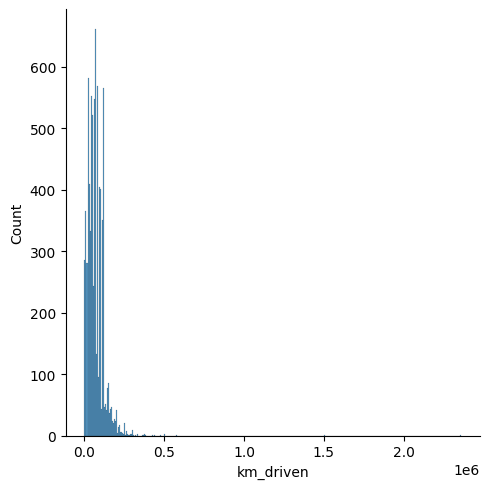

In [108]:
sns.displot(data=df_encoded, x='km_driven')

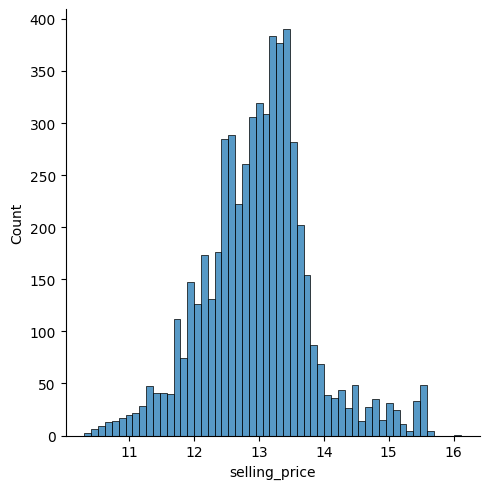

In [109]:
sns.displot(y_train)

In [110]:
# Calculating the median values for x_train and x_test and replacing missing values with median

# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [111]:
# Calculating the median values for x_train and x_test and replacing missing values with median

X_train['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)
X_test['km_driven'].fillna(X_train['km_driven'].median(), inplace=True)

In [112]:
# Calculating the mean values for x_train and x_test and replacing missing values with mean

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [113]:
X_train[['engine', 'mileage', 'km_driven', 'year']].isna().sum()
#Looks at every cell in your training data (X_train) and marks it as True if it's empty (missing) or False if it's not.
#Counts how many True values (missing cells) there are in each column of your training data.

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

In [114]:
X_test[['engine', 'mileage', 'km_driven', 'year']].isna().sum()

engine       0
mileage      0
km_driven    0
year         0
dtype: int64

## Checking Outliners

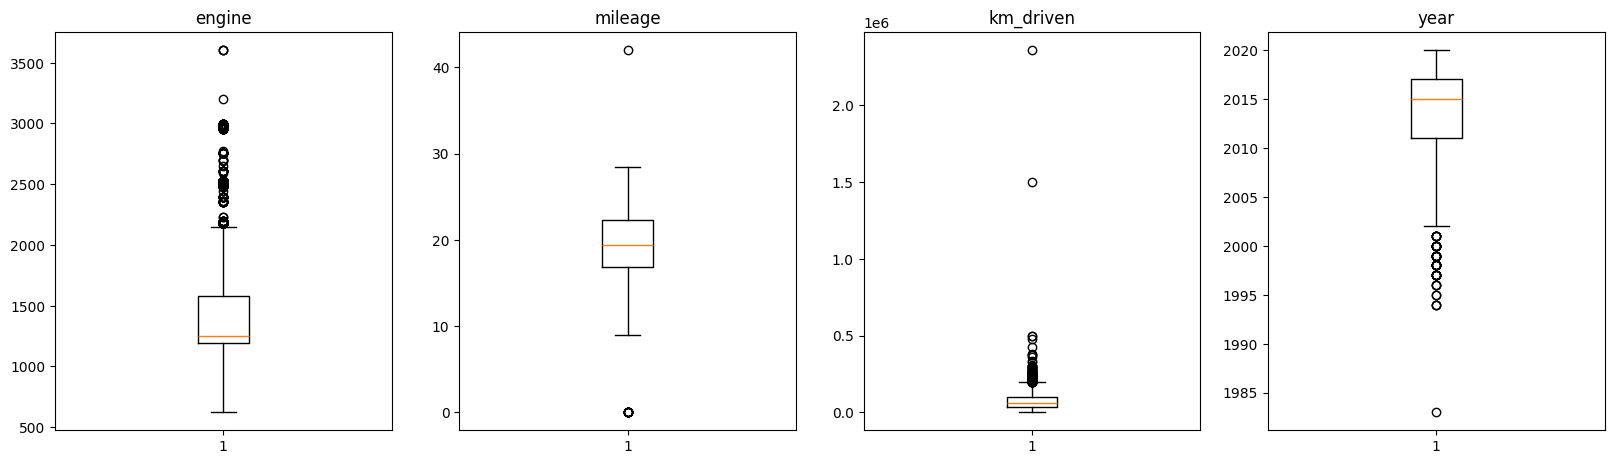

In [115]:
# Create a dictionary of columns.
col_dict = {'engine':1,'mileage':2, 'km_driven': 3, 'year':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [116]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [117]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 827
Percent of data that is outlier: 14.72%

---------------mileage---------------

Number of outliers: 15
Percent of data that is outlier: 0.27%

---------------km_driven---------------

Number of outliers: 117
Percent of data that is outlier: 2.08%

---------------year---------------

Number of outliers: 56
Percent of data that is outlier: 1.0%


## Scaling

In [118]:
from sklearn.preprocessing import MinMaxScaler
#The MinMaxScaler in sklearn.preprocessing scales numerical features to a fixed range, typically between 0 and 1.
# Reason to use MinMaxScaler
# - Keeps Original Data Distribution (Does Not Change Shape)
# - Ensures Features Are in a Uniform Range (0 to 1)
# - Works Well When Min and Max Are Known
# - Prevents Negative Values (Useful for Certain Models)
# - Useful for Distance-Based Algorithms

no_of_cols = ['engine', 'mileage', 'km_driven', 'year']

# Create a MinMaxScaler to scale features to a specified range (0 to 1)
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[no_of_cols] = scaler.fit_transform(X_train[no_of_cols])
X_test[no_of_cols] = scaler.transform(X_test[no_of_cols])

# This applies the MinMaxScaler transformation to the no_of_cols (i.e., numerical columns) in the X_test dataset.
# The transformation scales the values in each column to a specified range (0 to 1, as defined earlier in MinMaxScaler(feature_range=(0, 1))).
# However, it uses the same scaling parameters (min and max values) that were computed from X_train when fit_transform(X_train[num_cols]) was called.

In [119]:
# Checking the shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## Regularization

In [148]:
import mlflow
import os

print(mlflow.get_tracking_uri())

# mlflow_url = 'https://mlflow.ml.brain.cs.ait.ac.th/'
mlflow.set_tracking_uri('http://127.0.0.1:5000')


# os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
# os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.

# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "st125563-Inisha"
# mlflow.create_experiment(name="chaky-diabetes-example") 
# #create if you haven't create
# mlflow.create_experiment(name="st125563-Inisha-Pradhan") 
mlflow.set_experiment("st125563-Inisha")

http://127.0.0.1:5000


<Experiment: artifact_location='mlflow-artifacts:/329675350533377041', creation_time=1739552744247, experiment_id='329675350533377041', last_update_time=1739552744247, lifecycle_stage='active', name='st125563-Inisha', tags={}>

In [125]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)

# 1. Gradient Descent Configuration
# Learning rate (lr), momentum (momentum), and method (batch, mini-batch, or stochastic) suggest an optimization process.
# prev_step = 0 is likely used to track previous weight updates when using momentum-based optimization.

# 2. Regularization
# regularization indicates that some form of L1 (Lasso) or L2 (Ridge) regularization is applied.

# 3. Polynomial Features
# If polynomial=True, the model applies polynomial transformation to input features, expanding them up to degree.

# 4. Cross-Validation (cv)
# cv=kfold suggests k-fold cross-validation, which helps in model validation.

# 5. Weight Initialization (weight)
# weight='zeros' suggests the model initializes weights with zeros, but it might support other strategies like random initialization.
            
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold, polynomial= True, degree= 3, weight='zeros', momentum=0.0):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.weight = weight
        self.degree = degree
        self.momentum = momentum
        self.polynomial = polynomial
        self.prev_step = 0
    
    # Why Use MSE?
    # MSE penalizes large errors more than small errors because of squaring.
    # It's a smooth function (differentiable), making it useful for gradient-based optimization (e.g., gradient descent).
    # Commonly used in regression problems to measure how well a model fits the data.
    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    # Why Use R² Score?
    
    # The R² (R-squared) score, or coefficient of determination, is used to evaluate regression models by measuring how well the model's predictions explain the variance in the actual data.
    def r2(self, ytrue, ypred):
        ss_res = np.sum((ytrue - ypred) ** 2)  # Residual Sum of Squares (RSS) - Measures the total error in the model's predictions. Lower RSS = better model fit.
        ss_tot = np.sum((ytrue - np.mean(ytrue)) ** 2)  # Total Sum of Squares (TSS) - Measures the total variance in the actual data. Higher TSS = more variability in data.
        r2score = 1 - (ss_res / ss_tot) #If RSS is small, it means the model fits well, and R² is close to 1. If RSS is large, the model performs poorly, and R² approaches 0.
        return r2score
    
    # function to compute average mse for all kfold_scores
    def avgMse(self):
        return np.sum(np.array(self.kfold_scores))/len(self.kfold_scores)
    
    # function to compute average r2 for all kfold_scores
    def avgr2(self):
        return np.sum(np.array(self.kfold_r2))/len(self.kfold_r2)
    
    def fit(self, X_train, y_train):

        # Ensures that feature names are stored for later use.
        self.columns = X_train.columns

        if self.polynomial == True: # If True, it means the user wants to apply polynomial feature transformation to the dataset.
            X_train = self._transform_features(X_train) 
        # Calls a function _transform_features(X_train), which likely generates polynomial features (e.g., x^2, x^3, etc.) to improve model performance for non-linear relationships.
        # The transformed X_train replaces the original version.
            print(X_train.shape)
            print("Using Polynomial")
        else:
            X_train = X_train.to_numpy()
            print("Using Linear")
        # If self.polynomial is False, the dataset remains unchanged except that it is converted into a NumPy array.
        # This ensures consistency when passing data to machine learning models that require NumPy arrays instead of pandas DataFrames.

        y_train = y_train.to_numpy() #Converts the target variable (y_train) into a NumPy array for compatibility with ML models.

        #create a list of kfold scores and r2
        self.kfold_scores = list()
        self.kfold_r2 = list()
        
        #reset val lossß
        self.val_loss_old = np.inf

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if(self.weight == 'zeros'):
                self.theta = np.zeros(X_cross_train.shape[1]) # This condition checks if the self.weight attribute is set to 'zeros'. If so, it initializes the model's parameters (theta) to be a vector of zeros.
            elif(self.weight == 'xavier'):
                # number of samples
                m = X_cross_train.shape[0] # calculates the number of samples in the training set.

                # calculating the range for the weight
                lower, upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m)) # The range within which the weights will be initialized. This range depends on the size of the dataset (specifically the number of samples).
                num = np.random.rand(X_cross_train.shape[1]) # Generates random numbers between 0 and 1 for each feature.
                # The numbers are scaled and shifted to lie within the lower and upper bounds.
                # This helps to create weights that are small but not too close to zero, preventing issues with gradients during training.
                scaled = lower + num * (upper - lower)
                self.theta = scaled
            else:
                print("Weight Initialization Method Is Invalid")
                return
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, ) # (1, ) ==> (1, ) ==> (m, )
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    # The code is tracking the model's performance on the cross-validation data during each training epoch.
                    # Validation loss (MSE) and validation R² score are logged at each epoch using MLflow to monitor how well the model is generalizing.
                    yhat_val = self.predict(X_cross_val) # This line uses the model's predict method to make predictions on the cross-validation data (X_cross_val).
                    val_loss_new = self.mse(y_cross_val, yhat_val) # This line calculates the mean squared error (MSE) between the true labels (y_cross_val) and the predicted labels (yhat_val) for the cross-validation set.
                    val_r2_new = self.r2(y_cross_val, yhat_val) # This line calculates the R² (coefficient of determination) score between the true labels (y_cross_val) and the predicted labels (yhat_val) for the cross-validation data.
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch) # This line logs the calculated validation loss (MSE) (val_loss_new) into MLflow, a platform for managing machine learning experiments.
                    mlflow.log_metric(key="val_r2", value=val_r2_new, step=epoch) # Similar to the previous line, this logs the validation R² score (val_r2_new) into MLflow for the current epoch.
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)
                print(f"Fold {fold}: MSE:{val_loss_new}")
                print(f"Fold {fold}: r2:{val_r2_new}")
        
    def _transform_features(self, X):
        # Transform input features to include polynomial degree --> highest degree is taken
        X_poly = np.column_stack([X ** (self.degree)])        
        return X_poly
                 
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]

        if self.regularization:
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        else:
            grad = (1/m) * X.T @ (yhat - y)

        if(self.momentum >= 0 and self.momentum <= 1):
            #momentum implemented 
            gra = self.lr * grad
            self.theta = self.theta - gra + self.momentum * self.prev_step
            self.prev_step = gra
        else:
            #mommentum range is between (0, 1)
            self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]
    
    def features(self, X, features):
        return plt.barh(X.columns, features)
    
    def feature_importance(self, width=5, height=10):
        
    # Create a DataFrame with coefficients and feature names, if available
        if self.theta is not None and self.columns is not None:
            coefs = pd.DataFrame(data=self.theta, columns=['Coefficients'],index=self.columns) 
            coefs.plot(kind="barh", figsize=(width, height)) # Create a horizontal bar plot
            plt.title("Feature Importance") # Set the title of the plot
            plt.show()  # Display the plot
        else:
            print("Coefficients or feature names are not available to create the graph.")

    

In [126]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l,momentum, weight, polynomial, degree):
        self.regularization = LassoPenalty(l)
        
        super().__init__(self.regularization, lr, method, momentum=momentum, weight=weight, polynomial=polynomial, degree=degree)
    
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l,momentum, weight, polynomial, degree):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, momentum=momentum, weight=weight, polynomial=polynomial, degree=degree)

    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)
   
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l,  momentum, weight, polynomial, degree,l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, momentum=momentum, weight=weight, polynomial=polynomial, degree=degree)

    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)
    
class Normal(LinearRegression):  
    def __init__(self, method, lr, l, momentum, weight, polynomial, degree):
        self.regularization = None
        super().__init__(self.regularization, lr, method, momentum=momentum, weight=weight, polynomial=polynomial, degree=degree)
   
    
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

In [127]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

# Experiment

In [128]:
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]
lrs=[0.01,0.001,0.0001]
methods = ["sto","mini","batch"]
weight =['zeros','xavier']
momentums = [0.0,0.5]
momentum_message =""
for reg in regs:
    print("="*5, reg, "="*5)
    for method in methods:
        print("="*5, method, "="*5)
        for t in ispoly:
            if t==True:
                print("Polynomial")
            else:
                print("Linear")
            for w in weight:
                print("="*5, w, "="*5)
                for momentum in momentums:
                    if(momentum == 0):
                         momentum_message = "Momentum is not used"
                    else:
                        momentum_message ="Momentum is used"
                    print("="*5, momentum_message, "="*5)
                    for lr in lrs:
                        print("="*5, lr, "="*5)
                        params = {"method": method, "polynomial": t,  "lr": lr, "l": 0.1, "weight" :w, 
                        "degree":3, "momentum": momentum}
                        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-weight-{weight}", nested=True)                                            
                        
                        type_of_regression = str_to_class(reg)    
                        model = type_of_regression(**params) 
                        model.fit(X_train, y_train)
                        # model.fit(X_train, y_train)
                        yhat = model.predict(X_train)
                        mse = model.avgMSE()
                        r2 = model.avgr2()

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)

                        mlflow.log_metric(key="test_mse", value=mse)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


                        mlflow.end_run()

===== Ridge =====
===== sto =====
Polynomial
===== zeros =====
===== Momentum is not used =====
===== 0.01 =====
(5619, 4)
Using Polynomial
Fold 0: MSE:29.104191444403266
Fold 0: r2:-42.46786655255843
🏃 View run Fold-0 at: http://127.0.0.1:5000/#/experiments/329675350533377041/runs/5c1fce5d65a54c6e934dd77234464195
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/329675350533377041
Fold 1: MSE:27.99784421693743
Fold 1: r2:-39.959924824223805
🏃 View run Fold-1 at: http://127.0.0.1:5000/#/experiments/329675350533377041/runs/d630ce5ec25d43df947e1f398571a3ef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/329675350533377041
Fold 2: MSE:29.23458867939475
Fold 2: r2:-39.10398826306533
🏃 View run Fold-2 at: http://127.0.0.1:5000/#/experiments/329675350533377041/runs/de9a24b12e474bd68d8ecb4c32fa5621
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/329675350533377041
Test MSE:  28.778874780245147
Test R2:  -40.510593213282526
🏃 View run method-sto-lr-0.01-reg-Ridge-po

# Test The Best Model

In [129]:
reg = "Normal"
ispoly= False
method="sto"
momentum = 0
weight='xavier'
lrs =[0.01]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "weight" :weight, 
    "degree":3, "momentum":momentum}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-weight-{weight}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method:", method)
    print("Polynomial: ", ispoly)
    print("Momentun: ", momentum)
    print("Initialization: ", weight)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse  = model.mse(yhat, y_test)
    r2 = model.r2(yhat, y_test)

    print("Best MSE: ", mse)
    print("Best R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


    # #######
    mlflow.end_run()

===== Normal =====
Method: sto
Polynomial:  False
Momentun:  0
Initialization:  xavier
Learning Rate:  0.01
Using Linear
Fold 0: MSE:0.821470089482976
Fold 0: r2:-0.22688693464565524
🏃 View run Fold-0 at: http://127.0.0.1:5000/#/experiments/329675350533377041/runs/37f74a08973c455095051edd07fc749f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/329675350533377041
Fold 1: MSE:0.8546607759586798
Fold 1: r2:-0.2503405927340203
🏃 View run Fold-1 at: http://127.0.0.1:5000/#/experiments/329675350533377041/runs/e3c0040b49904e4a833b540064dce10b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/329675350533377041
Fold 2: MSE:0.8651953203801845
Fold 2: r2:-0.18687433417668742
🏃 View run Fold-2 at: http://127.0.0.1:5000/#/experiments/329675350533377041/runs/8d215e41674e459d9b8796a0ec301613
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/329675350533377041
Best MSE:  0.7326555316920594
Best R2:  0.6084477559197567
🏃 View run method-sto-lr-0.01-reg-Normal-poly-False-momen

# Feature Importance Shown In Graph

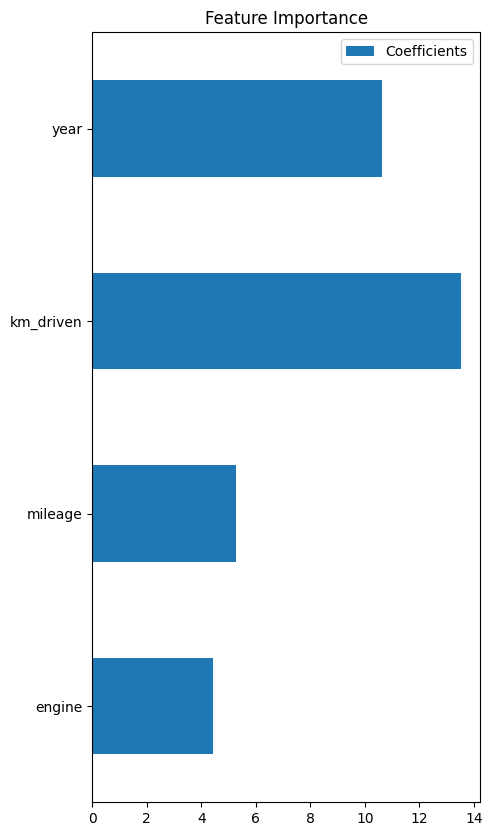

In [131]:
model.feature_importance()

# Inference

In [136]:
import pickle

# save the model as a pickel file
pickle.dump(model, open('model/cars.pkl', 'wb'))

In [135]:
# save the scaler to disk
pickle.dump(scaler, open('model/a2-scaler.model', 'wb'))

### Creating Sample Data

In [141]:
sampledata = {
    "engine": [1700],
    "mileage": [27],
    "km_driven": [3100],
    "year": [2018]
}

new_model = pickle.load(open("model/cars.pkl", 'rb'))

# convert to data frame
sampledata = pd.DataFrame(sampledata)

# predicting the car selling price
np.exp(new_model.predict(X_test).values[0])

np.float64(446198.63132726756)

In [142]:
df_encoded[['engine', 'mileage', 'km_driven', 'year']].loc[21]

engine        1498.0
mileage         25.5
km_driven    50000.0
year          2017.0
Name: 21, dtype: float64

In [144]:
scaler = pickle.load(open("model/a2-scaler.model",'rb'))
load_model = pickle.load(open('model/cars.pkl', 'rb'))

In [ ]:
feature_names = ['engine', 'mileage', 'km_driven', 'year']
sample_np = np.array([[1498.0, 25.5, 50000.0, 2017.0]])
sample_df = pd.DataFrame(sample_np, columns=feature_names)

sample_df[no_of_cols]= scaler.transform(sample_df[no_of_cols])

# predicted price
np.exp(new_model.predict(sample_df).values[0])

np.float64(2060247.8437225579)

In [147]:
# actual price
df_encoded['selling_price'].loc[21]

np.int64(950000)